## Get Data

In [62]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [63]:
x_train.shape

(50000, 32, 32, 3)

In [64]:
y_train.shape

(50000, 1)

In [65]:
x_test.shape

(10000, 32, 32, 3)

In [66]:
y_test.shape

(10000, 1)

## Data Exploring

In [67]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [68]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

## Data Manipulation

Create validation set:

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x_train,
                                                                y_train,
                                                                test_size=10000)

In [70]:
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)


Converting vectors to dummy matrices:

In [71]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

In [72]:
y_train[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## First Model

A basic network with three convolutional layers followed by max pooling layers, a flattening layer and one densely-connected layer, followed by a softmax-activated output layer

In [73]:
from keras import layers, models

model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=x_train.shape[1:]))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

In [74]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
__________

In [75]:
from keras import optimizers
model_1.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [76]:
history_1 = model_1.fit(x_train, y_train,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_validation, y_validation))

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 12s 301us/step - loss: 2.4248 - acc: 0.3469 - val_loss: 1.5381 - val_acc: 0.4568
Epoch 2/30
40000/40000 [==============================] - 12s 290us/step - loss: 1.4071 - acc: 0.5042 - val_loss: 1.4481 - val_acc: 0.4930
Epoch 3/30
40000/40000 [==============================] - 11s 283us/step - loss: 1.2394 - acc: 0.5660 - val_loss: 1.2649 - val_acc: 0.5547
Epoch 4/30
40000/40000 [==============================] - 13s 316us/step - loss: 1.1171 - acc: 0.6158 - val_loss: 1.2192 - val_acc: 0.5814
Epoch 5/30
40000/40000 [==============================] - 11s 268us/step - loss: 1.0118 - acc: 0.6502 - val_loss: 1.2243 - val_acc: 0.5907
Epoch 6/30
40000/40000 [==============================] - 11s 273us/step - loss: 0.9232 - acc: 0.6822 - val_loss: 1.1480 - val_acc: 0.6123
Epoch 7/30
40000/40000 [==============================] - 11s 281us/step - loss: 0.8455 - acc: 0.7087 - val_loss: 1.

Plotting the results of above:

In [31]:
import matplotlib.pyplot as plt

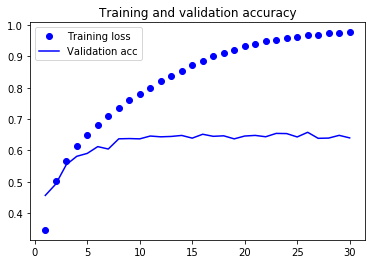

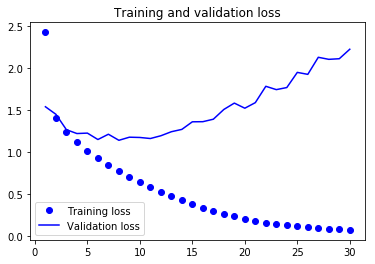

In [78]:
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Looking at the convolutional layer activations:

## Second Model

Improving the first model by including data augmentation

In [79]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [80]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=x_train.shape[1:]))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [81]:
history_2 = model_2.fit_generator(datagen.flow(x_train, y_train,
                                           batch_size=40),
                              steps_per_epoch=1000,  # unique samples divided by batch_size
                              epochs=100,
                              validation_data=(x_validation, y_validation),
                              workers=4)

Epoch 1/100
1000/1000 [==============================] - 25s 25ms/step - loss: 2.7331 - acc: 0.2520 - val_loss: 1.7371 - val_acc: 0.3784
Epoch 2/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.7663 - acc: 0.3607 - val_loss: 1.5806 - val_acc: 0.4416
Epoch 3/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.6676 - acc: 0.4029 - val_loss: 1.5305 - val_acc: 0.4601
Epoch 4/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.6046 - acc: 0.4253 - val_loss: 1.4425 - val_acc: 0.4873
Epoch 5/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.5497 - acc: 0.4462 - val_loss: 1.4820 - val_acc: 0.4864
Epoch 6/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.5067 - acc: 0.4678 - val_loss: 1.4746 - val_acc: 0.4808
Epoch 7/100
1000/1000 [==============================] - 25s 25ms/step - loss: 1.4681 - acc: 0.4788 - val_loss: 1.2637 - val_acc: 0.5484
Epoch 8/100
1000/1000 [==================

1000/1000 [==============================] - 24s 24ms/step - loss: 1.1515 - acc: 0.6055 - val_loss: 1.1240 - val_acc: 0.6306
Epoch 61/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1397 - acc: 0.6095 - val_loss: 1.2617 - val_acc: 0.5840
Epoch 62/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1418 - acc: 0.6069 - val_loss: 1.0683 - val_acc: 0.6589
Epoch 63/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1435 - acc: 0.6104 - val_loss: 1.1210 - val_acc: 0.6355
Epoch 64/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.1424 - acc: 0.6051 - val_loss: 0.9741 - val_acc: 0.6734
Epoch 65/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1390 - acc: 0.6092 - val_loss: 1.0616 - val_acc: 0.6351
Epoch 66/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1447 - acc: 0.6080 - val_loss: 0.9987 - val_acc: 0.6556
Epoch 67/100
1000/1000 [=======================

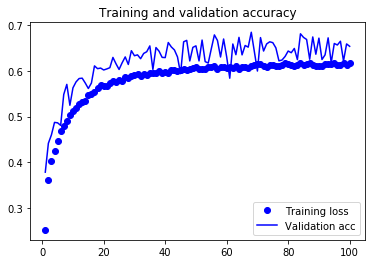

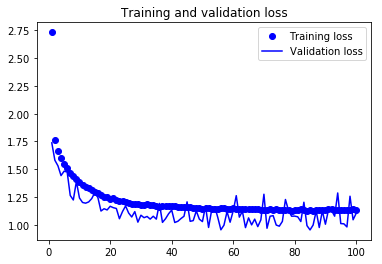

In [82]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Third Model

Using a pretrained model without data augmentation

In [42]:
# using the VGG16 model from Karen Simonyan and Andrew Zisserman
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                     include_top=False,
                     input_shape=(32, 32, 3))
conv_base.trainable = False

In [43]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [51]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_validation, y_validation))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 22s 556us/step - loss: 6.0345 - acc: 0.3814 - val_loss: 4.0476 - val_acc: 0.4880
Epoch 2/100
40000/40000 [==============================] - 23s 579us/step - loss: 3.4115 - acc: 0.5093 - val_loss: 3.2097 - val_acc: 0.5055
Epoch 3/100
40000/40000 [==============================] - 21s 537us/step - loss: 2.6102 - acc: 0.5502 - val_loss: 2.7128 - val_acc: 0.5363
Epoch 4/100
40000/40000 [==============================] - 23s 574us/step - loss: 2.1431 - acc: 0.5834 - val_loss: 2.5118 - val_acc: 0.5338
Epoch 5/100
40000/40000 [==============================] - 21s 529us/step - loss: 1.8315 - acc: 0.6076 - val_loss: 2.3144 - val_acc: 0.5490
Epoch 6/100
40000/40000 [==============================] - 21s 524us/step - loss: 1.6035 - acc: 0.6312 - val_loss: 2.2049 - val_acc: 0.5530
Epoch 7/100
40000/40000 [==============================] - 22s 552us/step - loss: 1.4341 - acc: 0.6528 - val_l

Epoch 59/100
40000/40000 [==============================] - 21s 521us/step - loss: 0.1527 - acc: 0.9685 - val_loss: 3.1276 - val_acc: 0.5604
Epoch 60/100
40000/40000 [==============================] - 21s 526us/step - loss: 0.1487 - acc: 0.9694 - val_loss: 3.1645 - val_acc: 0.5632
Epoch 61/100
40000/40000 [==============================] - 22s 542us/step - loss: 0.1431 - acc: 0.9713 - val_loss: 3.2080 - val_acc: 0.5612
Epoch 62/100
40000/40000 [==============================] - 22s 550us/step - loss: 0.1374 - acc: 0.9732 - val_loss: 3.2256 - val_acc: 0.5584
Epoch 63/100
40000/40000 [==============================] - 21s 533us/step - loss: 0.1329 - acc: 0.9749 - val_loss: 3.2858 - val_acc: 0.5582
Epoch 64/100
40000/40000 [==============================] - 21s 523us/step - loss: 0.1273 - acc: 0.9760 - val_loss: 3.3006 - val_acc: 0.5595
Epoch 65/100
40000/40000 [==============================] - 21s 520us/step - loss: 0.1236 - acc: 0.9781 - val_loss: 3.3378 - val_acc: 0.5566
Epoch 66/100


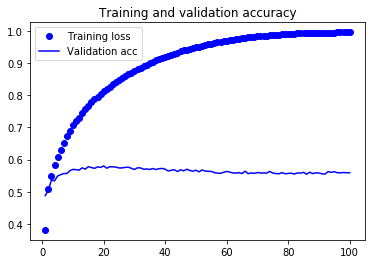

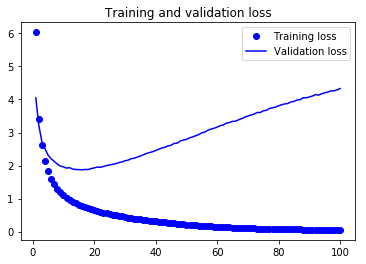

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fourth Model

Using a pretrained model with data augmentation

In [83]:
model_4 = models.Sequential()
model_4.add(conv_base)
model_4.add(layers.Flatten())
model_4.add(layers.Dense(256, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model_4.fit_generator(datagen.flow(x_train, y_train,
                                           batch_size=40),
                              steps_per_epoch=1000,
                              epochs=100,
                              validation_data=(x_validation, y_validation),
                              workers=4)

Epoch 1/100
1000/1000 [==============================] - 22s 22ms/step - loss: 7.2769 - acc: 0.3109 - val_loss: 5.1555 - val_acc: 0.3967
Epoch 2/100
1000/1000 [==============================] - 21s 21ms/step - loss: 4.6731 - acc: 0.3893 - val_loss: 3.8029 - val_acc: 0.4278
Epoch 3/100
1000/1000 [==============================] - 21s 21ms/step - loss: 3.6320 - acc: 0.4057 - val_loss: 3.1291 - val_acc: 0.4437
Epoch 4/100
1000/1000 [==============================] - 21s 21ms/step - loss: 2.9912 - acc: 0.4151 - val_loss: 2.6399 - val_acc: 0.4556
Epoch 5/100
1000/1000 [==============================] - 21s 21ms/step - loss: 2.5658 - acc: 0.4215 - val_loss: 2.3160 - val_acc: 0.4601
Epoch 6/100
1000/1000 [==============================] - 21s 21ms/step - loss: 2.2606 - acc: 0.4341 - val_loss: 2.0712 - val_acc: 0.4701
Epoch 7/100
1000/1000 [==============================] - 21s 21ms/step - loss: 2.0285 - acc: 0.4483 - val_loss: 1.8733 - val_acc: 0.4883
Epoch 8/100
1000/1000 [==================

1000/1000 [==============================] - 22s 22ms/step - loss: 1.3364 - acc: 0.5580 - val_loss: 1.4510 - val_acc: 0.5746
Epoch 61/100
1000/1000 [==============================] - 22s 22ms/step - loss: 1.3310 - acc: 0.5618 - val_loss: 1.4283 - val_acc: 0.5810
Epoch 62/100
1000/1000 [==============================] - 22s 22ms/step - loss: 1.3382 - acc: 0.5610 - val_loss: 1.4280 - val_acc: 0.5818
Epoch 63/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.3245 - acc: 0.5629 - val_loss: 1.4305 - val_acc: 0.5853
Epoch 64/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.3330 - acc: 0.5628 - val_loss: 1.4787 - val_acc: 0.5734
Epoch 65/100
1000/1000 [==============================] - 23s 23ms/step - loss: 1.3328 - acc: 0.5618 - val_loss: 1.4673 - val_acc: 0.5728
Epoch 66/100
1000/1000 [==============================] - 22s 22ms/step - loss: 1.3300 - acc: 0.5646 - val_loss: 1.4593 - val_acc: 0.5779
Epoch 67/100
1000/1000 [=======================

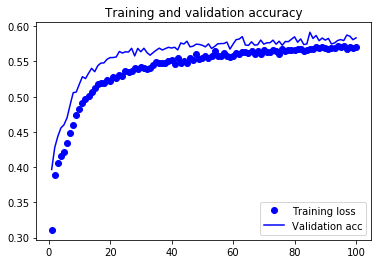

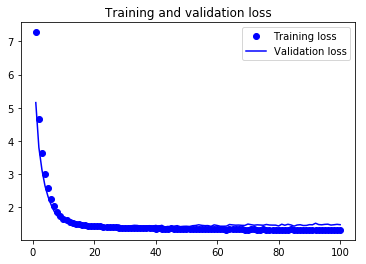

In [85]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fifth Model

Fine-tuning the fourth model by unfreezing its last few layers

In [86]:
# freezing all layers up to block5_conv1
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [88]:
model_5 = model_4

model_5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

# history_5 = model_5.fit_generator(train_generator,
#                               steps_per_epoch=100,
#                               epochs=100,
#                               validation_data=validation_generator,
#                               validation_steps=50)

history_5 = model_5.fit_generator(datagen.flow(x_train, y_train,
                                           batch_size=40),
                              steps_per_epoch=1000,
                              epochs=100,
                              validation_data=(x_validation, y_validation),
                              workers=4)

Epoch 1/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1925 - acc: 0.9265 - val_loss: 0.1936 - val_acc: 0.9303
Epoch 2/100
1000/1000 [==============================] - 26s 26ms/step - loss: 0.1827 - acc: 0.9296 - val_loss: 0.1868 - val_acc: 0.9329
Epoch 3/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1768 - acc: 0.9316 - val_loss: 0.1813 - val_acc: 0.9345
Epoch 4/100
1000/1000 [==============================] - 27s 27ms/step - loss: 0.1716 - acc: 0.9340 - val_loss: 0.1813 - val_acc: 0.9362
Epoch 5/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1684 - acc: 0.9350 - val_loss: 0.1742 - val_acc: 0.9376
Epoch 6/100
1000/1000 [==============================] - 27s 27ms/step - loss: 0.1653 - acc: 0.9358 - val_loss: 0.1652 - val_acc: 0.9399
Epoch 7/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1625 - acc: 0.9368 - val_loss: 0.1639 - val_acc: 0.9422
Epoch 8/100
1000/1000 [==================

1000/1000 [==============================] - 28s 28ms/step - loss: 0.1271 - acc: 0.9516 - val_loss: 0.1493 - val_acc: 0.9516
Epoch 61/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1254 - acc: 0.9521 - val_loss: 0.1493 - val_acc: 0.9519
Epoch 62/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1263 - acc: 0.9521 - val_loss: 0.1521 - val_acc: 0.9515
Epoch 63/100
1000/1000 [==============================] - 30s 30ms/step - loss: 0.1253 - acc: 0.9522 - val_loss: 0.1538 - val_acc: 0.9515
Epoch 64/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1257 - acc: 0.9520 - val_loss: 0.1388 - val_acc: 0.9531
Epoch 65/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1248 - acc: 0.9521 - val_loss: 0.1430 - val_acc: 0.9540
Epoch 66/100
1000/1000 [==============================] - 30s 30ms/step - loss: 0.1242 - acc: 0.9527 - val_loss: 0.1537 - val_acc: 0.9522
Epoch 67/100
1000/1000 [=======================

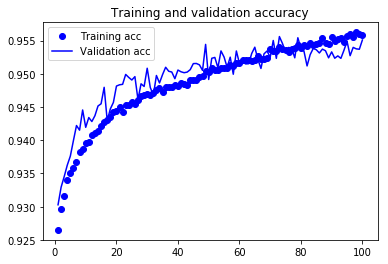

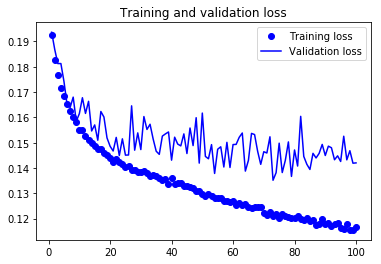

In [89]:
acc = history_5.history['acc']
val_acc = history_5.history['val_acc']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing on the Test Data

Taking the best model from above:

In [90]:
test_loss, test_acc = model_5.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 317us/step


In [91]:
print(test_loss)
print(test_acc)

0.1401977075457573
0.9550199954986572
